#Introduction to Machine Learning - FCE Summit 2015 - Las Vegas


> ## 1. Explore the data set
> ## 2. Linear Regression with one feature/variable
> ## 3. Linear Regression with two features/variables


## 1. Explore the data set

### Portland, Oregon housing price data


> housing_prices.txt contains prices of houses from Portland,Oregon. First column is size of the house, second column is the number of bedrooms and the third column is price of the house. 

### Housing Price data sample


| house_size    | number_of_bedrooms | house_price  |
|:-------------:|:------------------:|:------------:|
| 2104	        |                  3 |	     399900 |    
| 1600	        |                  3 |	     329900 |
| 2400	        |                  3 |	     369000 | 
| 1427	        |                  3 |	     198999 | 
| 1416	        |                  2 |	     232000 | 
| 3000	        |                  4 |	     539900 | 
| 1985	        |                  4 |	     299900 | 



We will now perform the following steps

1. Load the data set
2. Plot the data set


File location: "/Users/gmedasani/Documents/cloudera/conferences/FCE-Summit-2015/data/final/housing_prices.txt"

Code: 

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fileLocation = '/Users/gmedasani/Documents/cloudera/conferences/FCE-Summit-2015/data/final/housing_prices.txt'
housingPricesData = pd.read_csv(fileLocation)
```


In [282]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fileLocation = '/Users/gmedasani/Documents/cloudera/conferences/FCE-Summit-2015/data/final/housing_prices.txt'
housingPricesData = pd.read_csv(fileLocation)

In [283]:
type(housingPricesData)

pandas.core.frame.DataFrame

In [284]:
housingPricesData.columns

Index([u'house_size', u'number_of_bedrooms', u'house_price'], dtype='object')

In [285]:
housingPricesData.describe

<bound method DataFrame.describe of     house_size  number_of_bedrooms  house_price
0         2104                   3       399900
1         1600                   3       329900
2         2400                   3       369000
3         1416                   2       232000
4         3000                   4       539900
5         1985                   4       299900
6         1534                   3       314900
7         1427                   3       198999
8         1380                   3       212000
9         1494                   3       242500
10        1940                   4       239999
11        2000                   3       347000
12        1890                   3       329999
13        4478                   5       699900
14        1268                   3       259900
15        2300                   4       449900
16        1320                   2       299900
17        1236                   3       199900
18        2609                   4       499998
19  

In [286]:
housingPricesData.shape

(47, 3)

In [287]:
np.mean(housingPricesData.iloc[:,[0]])

house_size    2000.680851
dtype: float64

In [288]:
np.mean(housingPricesData.iloc[:,[1]])

number_of_bedrooms    3.170213
dtype: float64

In [289]:
np.mean(housingPricesData.iloc[:,[2]])

house_price    340412.659574
dtype: float64

Plot the data set
----------------

File location: "/Users/gmedasani/Documents/cloudera/conferences/FCE-Summit-2015/data/final/housing_prices.txt"

Code: 

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fileLocation = '/Users/gmedasani/Documents/cloudera/conferences/FCE-Summit-2015/data/final/housing_prices.txt'
housingPricesData = pd.read_csv(fileLocation)
# this allows plots to appear directly in the notebook
```

### Plot 1: Size of house vs. Price of house

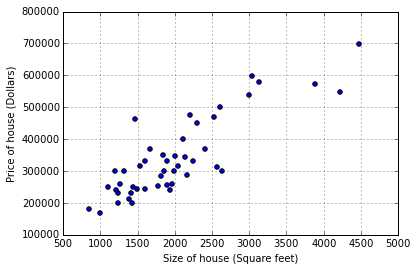

In [290]:
plt.scatter(housingPricesData.iloc[:,0],housingPricesData.iloc[:,2])
plt.xlabel('Size of house (Square feet)')
plt.ylabel('Price of house (Dollars)')
plt.grid(True)
plt.show()

### Plot 2: Number of bedrooms vs. Price of house


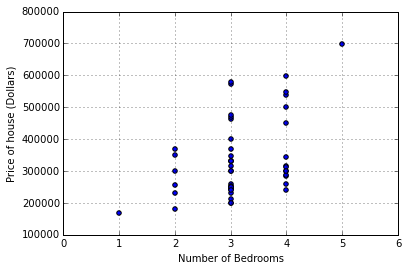

In [291]:
plt.scatter(housingPricesData.iloc[:,1],housingPricesData.iloc[:,2])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price of house (Dollars)')
plt.grid(True)
plt.show()


## 2. Linear Regression with one variable/feature


####1.   X = training features matrix 
####2.   y = training labels vector
####3.   Theta = parameters vector

Goal: Find theta parameters vector using Normal Equation Method on Least Squares Regression

For this experiment, lets consider only one feature house_size to predict the price of house. 

Step 1: Create a function called normalEquation() that takes in X feature matrix and y label vector and returns a parameter vector.

Reference-style: 
![alt text][normal-equation]

[normal-equation]: https://github.com/gdtm86/fts-summit-2015/blob/master/images/normal-Equation.png "Normal Equation"

![alt text](/Users/gmedasani/Documents/cloudera/conferences/FCE-Summit-2015/public-repo/fts-summit-2015/images/normal-Equation.png)


In [292]:
def normalEquation(X,y):
    theta = (np.linalg.inv(np.dot(np.transpose(X),X))).dot(np.dot(np.transpose(X),y))
    return theta

### Create training features vector and training lables vectos

1. Create feature vector
2. Create labels vector

In [293]:
X = housingPricesData.iloc[:,[0]]
y = housingPricesData.iloc[:,[2]]

In [294]:
X.shape

(47, 1)

In [295]:
y.shape

(47, 1)

### Add the extra feature to the feature vector

1. Add ones column to the X vector and name it as Xnew


In [296]:
ones = np.ones((47,1))
Xnew = np.concatenate((ones,X),axis=1)

In [297]:
Xnew.shape

(47, 2)

In [298]:
Xnew

array([[  1.00000000e+00,   2.10400000e+03],
       [  1.00000000e+00,   1.60000000e+03],
       [  1.00000000e+00,   2.40000000e+03],
       [  1.00000000e+00,   1.41600000e+03],
       [  1.00000000e+00,   3.00000000e+03],
       [  1.00000000e+00,   1.98500000e+03],
       [  1.00000000e+00,   1.53400000e+03],
       [  1.00000000e+00,   1.42700000e+03],
       [  1.00000000e+00,   1.38000000e+03],
       [  1.00000000e+00,   1.49400000e+03],
       [  1.00000000e+00,   1.94000000e+03],
       [  1.00000000e+00,   2.00000000e+03],
       [  1.00000000e+00,   1.89000000e+03],
       [  1.00000000e+00,   4.47800000e+03],
       [  1.00000000e+00,   1.26800000e+03],
       [  1.00000000e+00,   2.30000000e+03],
       [  1.00000000e+00,   1.32000000e+03],
       [  1.00000000e+00,   1.23600000e+03],
       [  1.00000000e+00,   2.60900000e+03],
       [  1.00000000e+00,   3.03100000e+03],
       [  1.00000000e+00,   1.76700000e+03],
       [  1.00000000e+00,   1.88800000e+03],
       [  

### Run normalEquation by passing new training matrix and labels vector

### This will retun the Theta vector

In [299]:
Theta = normalEquation(Xnew,y)

In [300]:
Theta

array([[ 71270.49244873],
       [   134.52528772]])

### Verify the results with Scikit-learn results

In [301]:
from sklearn import cross_validation
from sklearn import datasets, linear_model

In [302]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [303]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [304]:
print regr.intercept_
print regr.coef_

[ 71270.49244873]
[[ 134.52528772]]


### Split the data into training and test datasets

In [305]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.20, random_state=10)

In [306]:
X_train.shape

(37, 1)

In [307]:
y_train.shape

(37, 1)

In [308]:
X_test.shape

(10, 1)

In [309]:
y_test.shape

(10, 1)

### Run Linear Regression and evaluate the model

1) Calculate the RMSE

In [311]:
model1 = linear_model.LinearRegression()
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [312]:
import math
RMSE = math.sqrt(np.mean((model1.predict(X_test) - y_test) ** 2))

In [313]:
print RMSE

54573.8179417


## 3. Linear Regression with multiple variables/features


####1.   X = training features matrix 
####2.   y = training labels vector
####3.   Theta = parameters vector

Goal: Find theta parameters vector using Normal Equation Method on Least Squares Regression

For this experiment, lets consider two features house_size and number_of_bedrooms to predict the price of house. 


In [314]:
X = housingPricesData.iloc[:,[0,1]]
y = housingPricesData.iloc[:,[2]]

In [315]:
X.shape

(47, 2)

In [316]:
y.shape

(47, 1)

### Add the extra feature to the feature vector

1. Add ones column to the X vector and name it as Xnew

In [317]:
ones = np.ones((47,1))
Xnew = np.concatenate((ones,X),axis=1)

In [318]:
Xnew.shape

(47, 3)

In [319]:
Xnew

array([[  1.00000000e+00,   2.10400000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.60000000e+03,   3.00000000e+00],
       [  1.00000000e+00,   2.40000000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.41600000e+03,   2.00000000e+00],
       [  1.00000000e+00,   3.00000000e+03,   4.00000000e+00],
       [  1.00000000e+00,   1.98500000e+03,   4.00000000e+00],
       [  1.00000000e+00,   1.53400000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.42700000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.38000000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.49400000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.94000000e+03,   4.00000000e+00],
       [  1.00000000e+00,   2.00000000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.89000000e+03,   3.00000000e+00],
       [  1.00000000e+00,   4.47800000e+03,   5.00000000e+00],
       [  1.00000000e+00,   1.26800000e+03,   3.00000000e+00],
       [  1.00000000e+00,   2.30000000e+03,   4.0000000

### Run normalEquation by passing new training matrix and labels vector

### This will retun the Theta vector

In [320]:
Theta = normalEquation(Xnew,y)

In [321]:
Theta

array([[ 89597.9095428 ],
       [   139.21067402],
       [ -8738.01911233]])

### Verify the results with Scikit-learn results

In [322]:
regr_multipleFeatures = linear_model.LinearRegression()

In [323]:
regr_multipleFeatures.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [324]:
print regr_multipleFeatures.intercept_
print regr_multipleFeatures.coef_

[ 89597.9095428]
[[  139.21067402 -8738.01911233]]


### Split the data into training and test datasets

In [325]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.20, random_state=11)

In [326]:
X_train.shape

(37, 2)

In [327]:
y_train.shape

(37, 1)

In [328]:
X_test.shape

(10, 2)

In [329]:
y_test.shape

(10, 1)

### Run Linear Regression and evaluate the model

1) Calculate the RMSE

In [330]:
model2 = linear_model.LinearRegression()
model2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [331]:
import math
RMSE = math.sqrt(np.mean((model2.predict(X_test) - y_test) ** 2))
print RMSE

51309.0705831


### Plot actual values vs predicted values

1. Create the y_predicted vector

In [345]:
y_predicted = model2.predict(X_test)

In [346]:
X_test[:, 0]

array([2400, 1437, 1811, 1604, 1380, 1268, 1852, 1664, 1839, 2567])

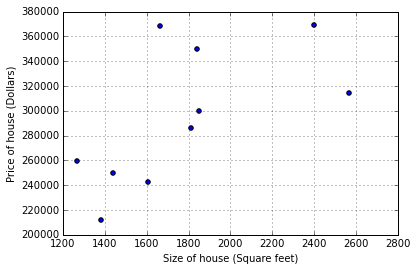

In [347]:
plt.scatter(X_test[:,0],y_test)
plt.xlabel('Size of house (Square feet)')
plt.ylabel('Price of house (Dollars)')
plt.grid(True)
plt.show()

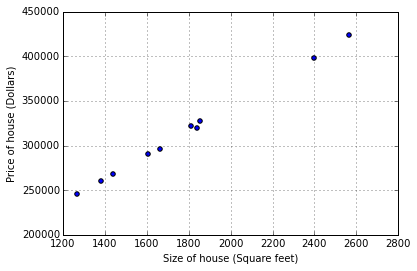

In [344]:
plt.scatter(X_test[:,0],y_predicted)
plt.xlabel('Size of house (Square feet)')
plt.ylabel('Price of house (Dollars)')
plt.grid(True)
plt.show()